Заведем системные функции

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

In [261]:
N_GRAPH = 100

In [262]:
def get_xs(xl, xr, n):
    s = (xr - xl) / (n - 1)
    return np.arange(xl, xr + 10 ** -9, s)

In [263]:
def get_diff(xs, f1, f2):
    return list(map(lambda x: abs(f1(x) - f2(x)), xs))

In [264]:
def draw(xs, ys, names=None):
    if type(xs) is not list:
        xs = [xs]
        ys = [ys]
        if names is not None:
            names = [names]
            
    n = len(xs)
    for i in range(n):
        plt.plot(xs[i], ys[i])
        
    if names is not None:
        plt.legend(names)
    plt.show()

# Упражнение 1

Воспользуемся методом Ньютона для поиска корней.

In [265]:
def p(n, x):
    return legendre(n)(x)

In [266]:
def dp(n, x):
    return n / (1 - x ** 2) * (p(n - 1, x) - x * p(n, x))

Итеративно считаем корни.

In [267]:
def get_roots(n):
    roots = []
    for c in range(n):
        roots = [-1] + roots + [1]
        
        n_roots = []
        for i in range(1, len(roots)):
            x = (roots[i - 1] + roots[i]) / 2
            for j in range(N_GRAPH):
                x -= p(c + 1, x) / dp(c + 1, x)
                
            n_roots.append(x)
            
        roots = n_roots
        
    return roots

Метод Симпсона мы уже реализовывали.

In [268]:
def int_simpson(f, a, b, n):
    dx = (b - a) / n
    S = sum(2 * f(a + dx * i) + 4 * f(a + dx * i + dx / 2) for i in range(n)) - f(a) + f(b)
    return S * dx / 6

Пользуемся методом Симпсона для вычисления корней по формуле:

$$\int_a^b \prod_{k \neq i} \frac{x - x_k}{x_i - x_k} \rho(x) dx$$

In [269]:
def get_weights(roots):
    def gen_f(i, n, r):
        def f(x):
            res = 1
            for j in range(n):
                if j != i:
                    res *= ((x - r[j]) / (r[i] - r[j]))
            return res
        return f
    
    n = len(roots)
    return [int_simpson(gen_f(i, n, roots), -1, 1, N_GRAPH) for i in range(n)]

Считаем интеграл.

In [270]:
def int_gauss(f, a, b, n):
    roots = get_roots(n)
    wi = get_weights(roots)
    S = sum(wi[i] * f((b - a) / 2 * roots[i] + (a + b) / 2) for i in range(n))
    return S * (b - a) / 2

In [271]:
def f(x):
    return 1 / (1 + 9 * x ** 2)

def primitive(x):
    return 1 / 3 * np.arctan(3 * x)

def integral(a, b):
    return primitive(b) - primitive(a)

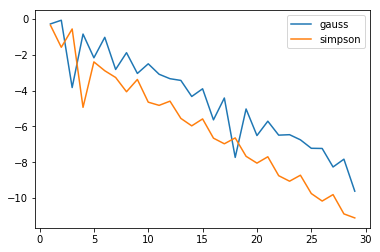

In [272]:
a = -1
b = 5

n = 30

xs = list(range(1, n))
ys1 = get_diff(xs,
             lambda x: integral(a, b),
             lambda x: int_gauss(f, a, b, x))
ys2 = get_diff(xs,
             lambda x: integral(a, b),
             lambda x: int_simpson(f, a, b, x))

ys1 = list(map(lambda x: np.log(x), ys1))
ys2 = list(map(lambda x: np.log(x), ys2))

xs = [xs] * 2
ys = [ys1, ys2]
names = ["gauss", "simpson"]
draw(xs, ys, names)

Из графика видно, что ошибка убывает экспоненциально. Точнасть близка с методам Симпсона, но чуть хуже.